In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def draw_normalised_plot(datapoints, bins):
  n, bins, patches = plt.hist(datapoints, bins=bins, density=True)

  # Scale the height of the bars to make the area under the histogram equal to 1
  bin_width = bins[1] - bins[0]
  area = np.sum(n * bin_width)
  scaling_factor = 1.0 / area
  n = n * scaling_factor

  # Plot the normalized histogram
  plt.clf()
  plt.hist(datapoints, bins=bins, density=True)
  plt.show()

**I. Generate arrays using numpy**

In [2]:
## Uniform distribution
dist_uniform = np.random.uniform(low=0.0, high=1.0, size=1000)

## Normal distributions
dist_norm_1 = np.random.normal(loc=0.0, scale=1.0, size=1000)
dist_norm_10 = np.random.normal(loc=0.0, scale=10, size=1000)

## Beta distributions
dist_beta_11 = np.random.beta(a=1, b=1, size=1000)
dist_beta_22 = np.random.beta(a=2, b=2, size=1000)
dist_beta_39 = np.random.beta(a=3, b=9, size=1000)

## Multi-dimensional normal
mean = np.array([0, 0])
cov_1 = np.array([[1, 0], [0, 1]])
cov_2 = np.array([[2, 1], [1, 2]])
dist_multi_normal_1 = np.random.multivariate_normal(mean=mean, cov=cov_1, size=10000)
dist_multi_normal_2 = np.random.multivariate_normal(mean=mean, cov=cov_1, size=10000)

**II. Histograms for 1D distributions**

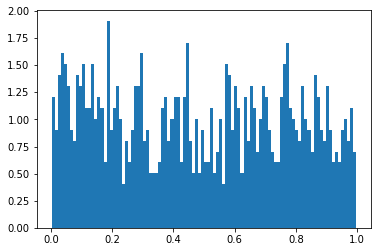

In [8]:
# Uniform (-1, 1)
draw_normalised_plot(dist_uniform, 100)
# It should be approximately a 1x1 square 

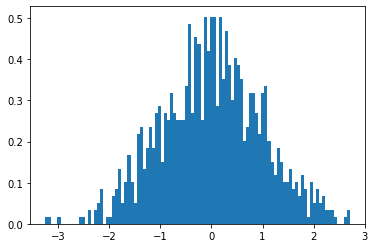

In [9]:
# Normal mi=0 std=1
draw_normalised_plot(dist_norm_1, 100)

# It should be approximately a 1x1 square 

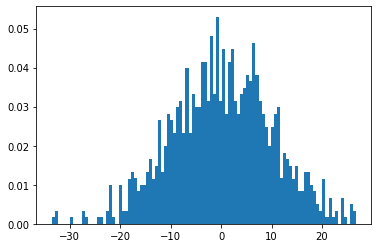

In [10]:
# Normal mi=0 std=10
draw_normalised_plot(dist_norm_10, 100)


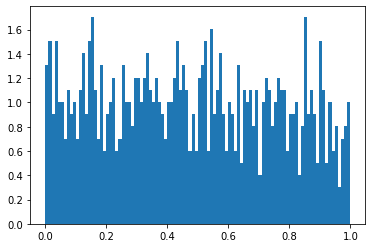

In [11]:
# Beta a=1 b=1
draw_normalised_plot(dist_beta_11, 100)

# It is just a uniform distribution

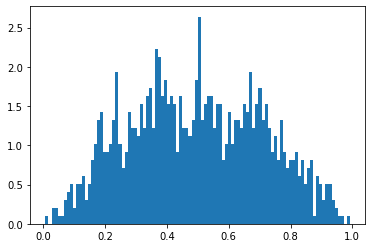

In [12]:
# Beta a=2 b=2
draw_normalised_plot(dist_beta_22, 100)

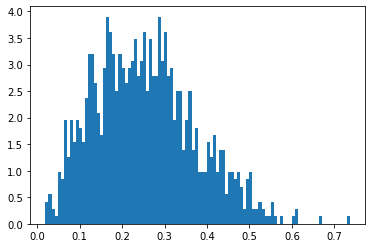

In [13]:
# Beta a=3 b=9
draw_normalised_plot(dist_beta_39, 100)

# Skewed as expected

**III. 2D Histograms. Analyse the influence of bin numbers.**

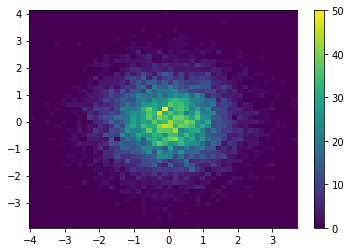

In [ ]:
# Multi-variable normal distribution. n_bins=50
x = dist_multi_normal_1[:, 0]
y = dist_multi_normal_1[:, 1]
n_bins = 50
plt.hist2d(x=x, y=y, bins=n_bins)
plt.colorbar()
plt.show()

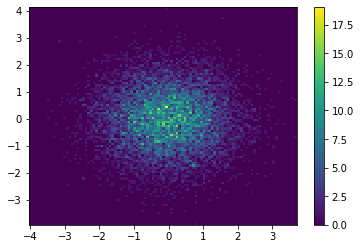

In [ ]:
# Multi-variable normal distribution. n_bins=100
x = dist_multi_normal_1[:, 0]
y = dist_multi_normal_1[:, 1]
n_bins = 100
plt.hist2d(x=x, y=y, bins=n_bins)
plt.colorbar()
plt.show()

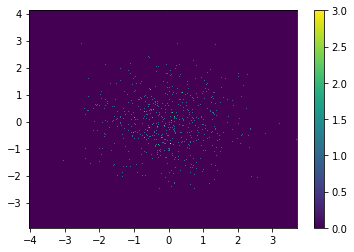

In [ ]:
# Multi-variable normal distribution. n_bins=100
x = dist_multi_normal_1[:, 0]
y = dist_multi_normal_1[:, 1]
n_bins = 1000
plt.hist2d(x=x, y=y, bins=n_bins)
plt.colorbar()
plt.show()

The overall number of bins affects the readability of histograms. On the one hand it increases granularity thus making it easier to discern the areas of points concentration. On the other hand the higher the number of bins is the lower counts the individual bins get thus rendering heat maps useless from the analytical point of view. 

**IV. Sampling of y value**

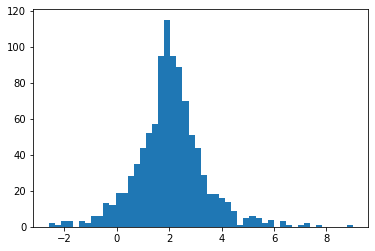

In [ ]:
y = []
X = []
A = []
B = []
S = []

n_bins = 50

for _ in range(1000):
    # Sample base parameters
    a = np.random.normal(loc=2.0, scale=0.1)
    A.append(a)
    
    b = np.random.normal(loc=0.2, scale=0.2)
    B.append(b)
    
    sigma = np.abs(np.random.normal(loc=0.0, scale=1.0))
    S.append(sigma)
    
    x = np.random.normal(loc=0.0, scale=3.0)
    X.append(x)
    
    # Calculate derived parameters
    mi = a + b*x
    
    # Sample y
    y.append(np.random.normal(loc=mi, scale=sigma))
    
plt.hist(y, bins=n_bins)
plt.show()

**V. Plot y(x)**

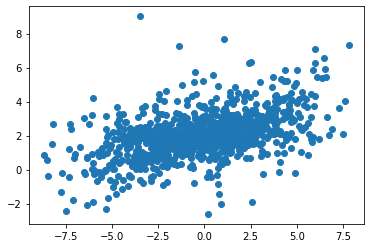

In [ ]:
## The corresponding scatterplot
plt.scatter(X, y)
plt.show()

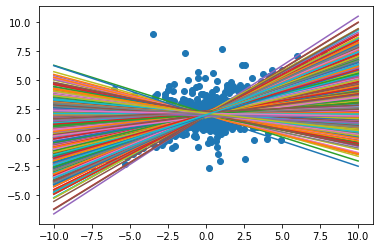

In [ ]:
X_vals = np.linspace(-6, 6, num=1000)
for idx in range(len(A)):
    Y = A[idx] + B[idx]*X_vals
    plt.plot(X_vals, Y)

plt.scatter(X, y)
plt.show()


In [ ]:
Y